In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *

%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Gridtools not found
Done


# Intro
- This is for running test cases on a lo res case from scratch 

In [2]:
store_name = "a4c"

In [2]:
cases = read_file(rf"C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\{store_name}.pkl")
casenames = cases.keys()
print(casenames)

NameError: name 'store_name' is not defined

In [3]:
casestore = dict()

In [4]:
db = CaseDB(case_dir = os.path.join(onedrive_path, r"Project\collab\tech\cases"),
            grid_dir = os.path.join(onedrive_path, r"Project\collab\tech\grid"))

toload = [
    dict(name="base", id="x3a1-mxorder3-1e-4rtol", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    dict(name="fixes_minmod", id="x3a2-post_1D_fixes", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    dict(name="fixes_mc", id="x3a6-x3a2_mc", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    dict(name="fixes_noslopereac", id="x3a7-x3a2_noslope_reac", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    dict(name="fixes_mc_noslopereac", id="x3a8-x3a2_mc_noslope_reac", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    dict(name="fixes_mc_noelecss", id="x3a8-x3a2_mc_noslope_reac", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    dict(name="fixes_mc_noelecss_ionviscosity", id="x3a10-x3a9_ionviscosity", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
]

for case in toload:
    casestore[case["name"]] = Load.case_2D(db.casepaths[case["id"]], gridfilepath = db.gridpaths[case["grid"]],
                                           double_load = False, keep_xboundaries = True, keep_yboundaries = True,
                                           unnormalise_geom = case["unnormalise_geom"])

CHECK: Total domain volume is 1.607E+00 [m3]
CHECK: Total domain volume is 1.607E+00 [m3]
CHECK: Total domain volume is 1.607E+00 [m3]


## Residuals

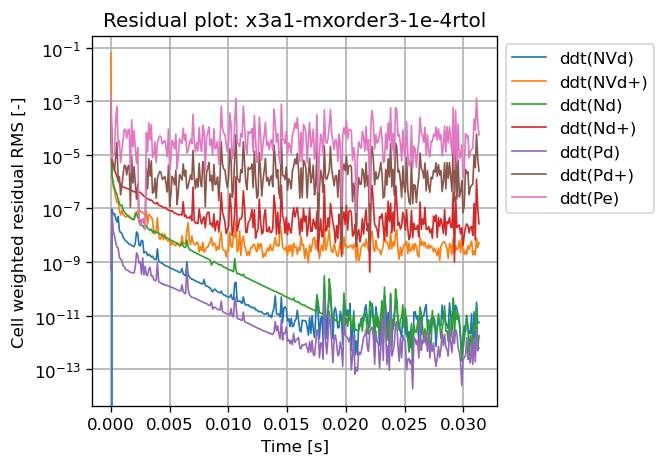

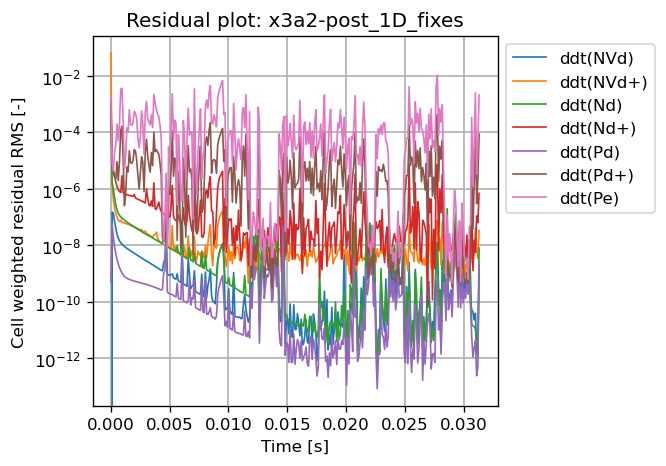

In [22]:
for i, name in enumerate(casenames):
    plot_ddt(cases[name])
    # , ylims = (1e-14, 1e-2), xlims = (0,0.05))

In [7]:
hr = dict()
for hermes_case in casestore.keys():
    print(hermes_case)
    hr[hermes_case] = Hermesdata()

    hr[hermes_case].read_case(casestore[hermes_case].ds.isel(t=-1, x = slice(2,-2)))

base
fixes_minmod
fixes_mc
fixes_noslopereac


In [8]:
from code_comparison.viewer_2d import *

In [9]:
plt.close("all")
%matplotlib inline

In [ ]:
cases["x3a1"]

In [11]:
casestore.keys()

dict_keys(['base', 'fixes_minmod', 'fixes_mc', 'fixes_noslopereac'])

Pre-fixes
Fixes - MinMod
Fixes - MC
Fixes - MinMod, simple cell averaging in reactions


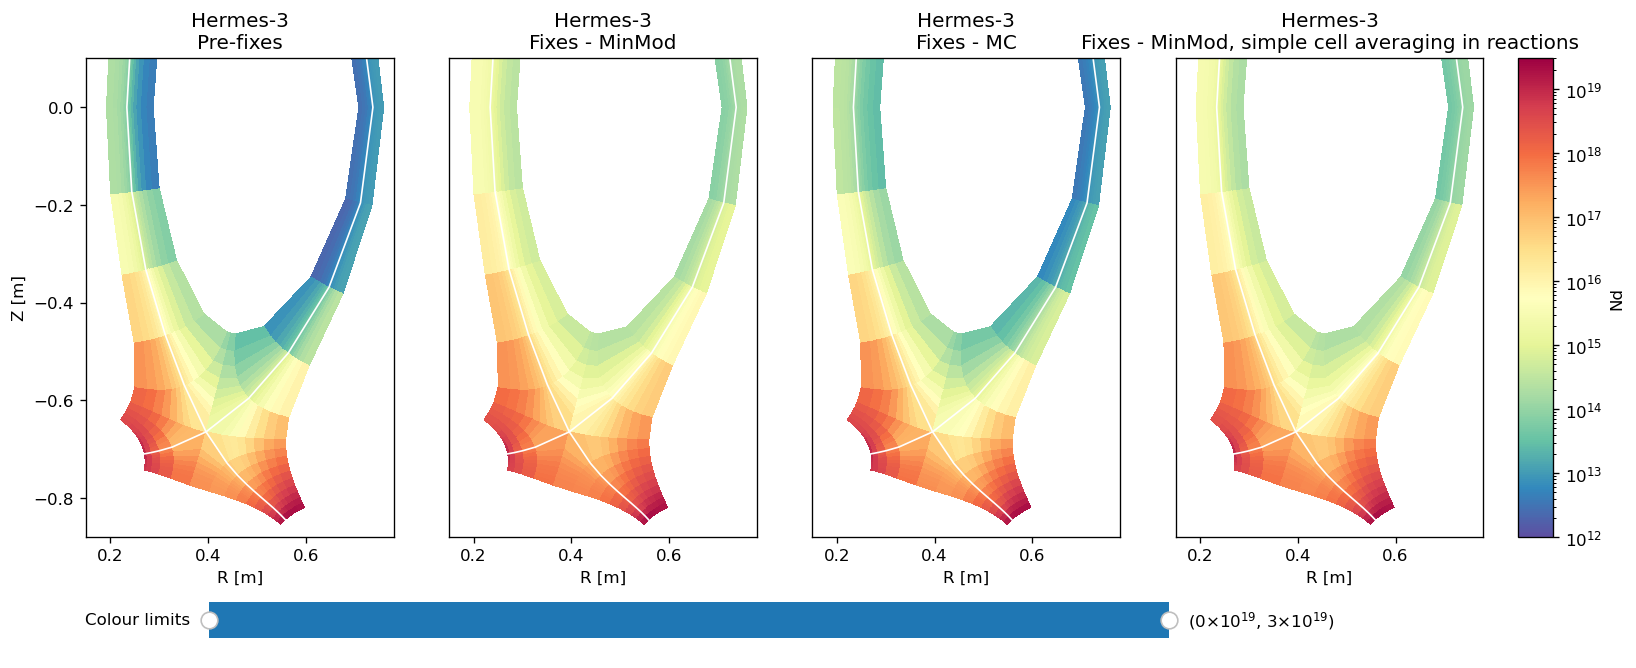

In [36]:
v = viewer_2d(
    "Nd",
    {
        "Pre-fixes"  : {"code":"hermes", "ds" : casestore["base"].ds.isel(t=-1)},
        "Fixes - MinMod" : {"code":"hermes", "ds" : casestore["fixes_minmod"].ds.isel(t=-1)},
        "Fixes - MC" : {"code":"hermes", "ds" : casestore["fixes_mc"].ds.isel(t=-1)},
        "Fixes - MinMod, simple cell averaging in reactions" : {"code":"hermes", "ds" : casestore["fixes_noslopereac"].ds.isel(t=-1)},
        
    },
    logscale = True,
    vmin = 1e12,
    vmax = 3e19,
)

In [48]:
for name in casestore:
    ds = casestore[name].ds
    ds["Vd"] = ds["NVd"] / (constants("mass_p")*2 * ds["Nd"])
    ds["Rd+_ex"] = abs(ds["Rd+_ex"])
    for species in ["d+", "d"]:
        
        ds[f"Pdyn{species}"] = ds[f"NV{species}"] * ds[f"V{species}"]
        ds[f"Ptot{species}"] = ds[f"P{species}"] + ds[f"Pdyn{species}"]

In [31]:
toload

[{'name': 'base',
  'id': 'x3a1-mxorder3-1e-4rtol',
  'grid': 'g3b1-lores_newhypno.nc',
  'unnormalise_geom': True},
 {'name': 'fixes_minmod',
  'id': 'x3a2-post_1D_fixes',
  'grid': 'g3b1-lores_newhypno.nc',
  'unnormalise_geom': True},
 {'name': 'fixes_mc',
  'id': 'x3a6-x3a2_mc',
  'grid': 'g3b1-lores_newhypno.nc',
  'unnormalise_geom': True},
 {'name': 'fixes_noslopereac',
  'id': 'x3a7-x3a2_noslope_reac',
  'grid': 'g3b1-lores_newhypno.nc',
  'unnormalise_geom': True},
 {'name': 'fixes_mc_noslopereac',
  'id': 'x3a8-x3a2_mc_noslope_reac',
  'grid': 'g3b1-lores_newhypno.nc',
  'unnormalise_geom': True},
 {'name': 'fixes_mc_noelecss',
  'id': 'x3a8-x3a2_mc_noslope_reac',
  'grid': 'g3b1-lores_newhypno.nc',
  'unnormalise_geom': True},
 {'name': 'fixes_mc_noelecss_ionviscosity',
  'id': 'x3a10-x3a9_ionviscosity',
  'grid': 'g3b1-lores_newhypno.nc',
  'unnormalise_geom': True}]

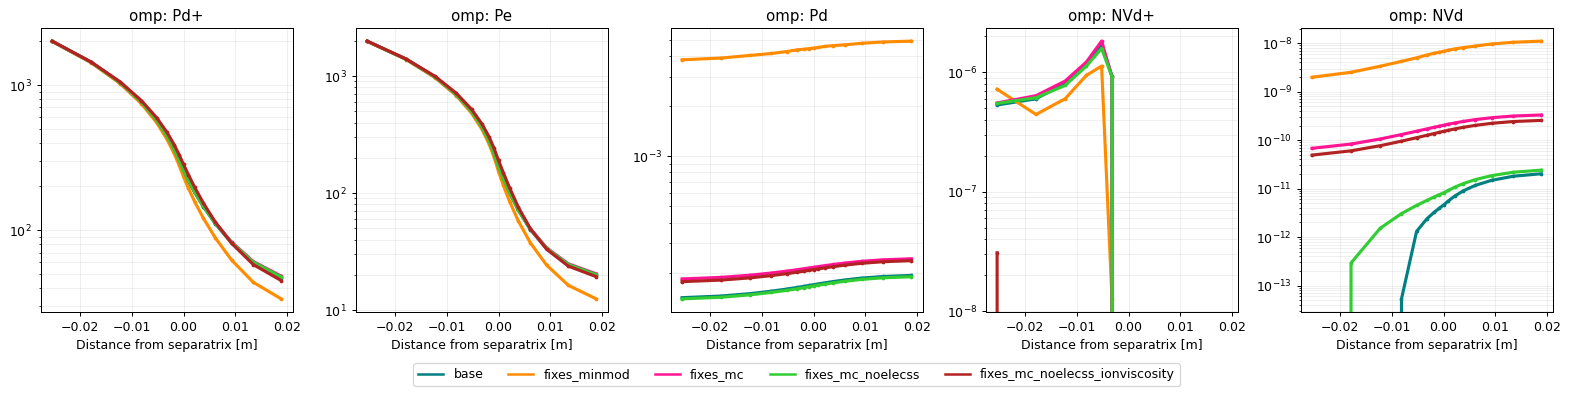

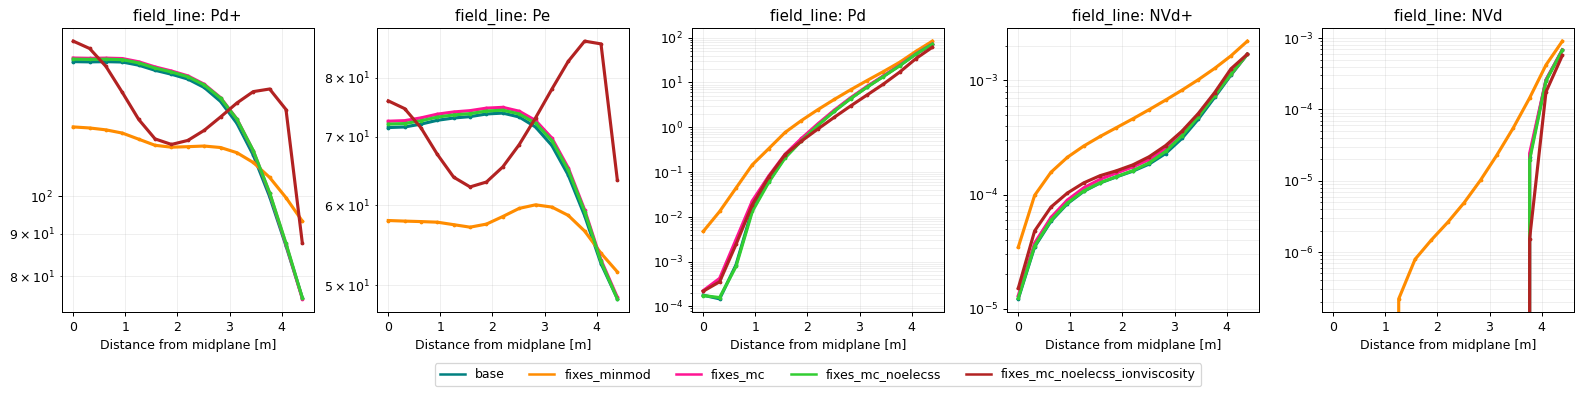

In [34]:
cases = dict()

for name in ["base", "fixes_minmod", "fixes_mc", "fixes_mc_noelecss", "fixes_mc_noelecss_ionviscosity"]:
    cases[name] = casestore[name].ds.isel(t=-1, x = slice(2,-2))

lineplot(
    cases = cases,
    
    clean_guards = False,
    regions = ["omp", "field_line"],
    # params = ["Td+", "Te", "Td", "Ne", "Nd"],
    params = ["Pd+", "Pe", "Pd", "NVd+", "NVd"],
    # params = ["Pd+", "Pdynd+", "Ptotd+", "Ne"],
    # params = ["Pd", "Pdynd", "Ptotd", "Nd"],
    # params = ["Td+", "Te", "Td"],
    # params = ["Ne", "Nd", "NVd+", "NVd"],
    # params = ["Ne", "Nd", "Sd+_iz"],
    dpi = 90
)

In [24]:
name

{'name': 'base',
 'id': 'x3a1-mxorder3-1e-4rtol',
 'grid': 'g3b1-lores_newhypno.nc',
 'unnormalise_geom': True}

In [28]:
casestore["base"].ds.data_vars

Data variables:
    Bxy                 (x, theta) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    Dnnd                (t, x, theta) float64 dask.array<chunksize=(301, 20, 7), meta=np.ndarray>
    Ed+_iz              (t, x, theta) float64 dask.array<chunksize=(301, 20, 7), meta=np.ndarray>
    Ed+_rec             (t, x, theta) float64 dask.array<chunksize=(301, 20, 7), meta=np.ndarray>
    Edd+_cx             (t, x, theta) float64 dask.array<chunksize=(301, 20, 7), meta=np.ndarray>
    Fd+_iz              (t, x, theta) float64 dask.array<chunksize=(301, 20, 7), meta=np.ndarray>
    Fd+_rec             (t, x, theta) float64 dask.array<chunksize=(301, 20, 7), meta=np.ndarray>
    Fdd+_cx             (t, x, theta) float64 dask.array<chunksize=(301, 20, 7), meta=np.ndarray>
    G1                  (x, theta) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    G2                  (x, theta) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    G3                  (x, 

In [26]:
for case in toload:
    name = case["name"]
    time = casestore[name].ds["wtime"].isel(t=-1)
    print(f"{name} : {time}")

KeyError: 'wtime'

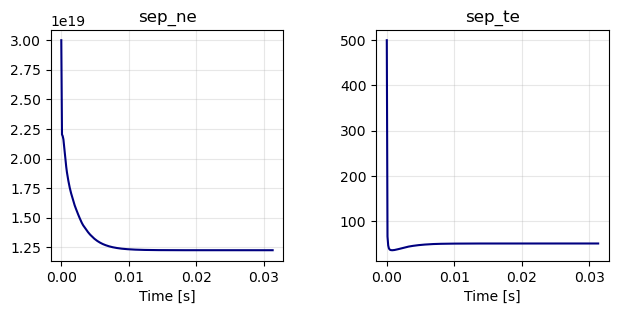

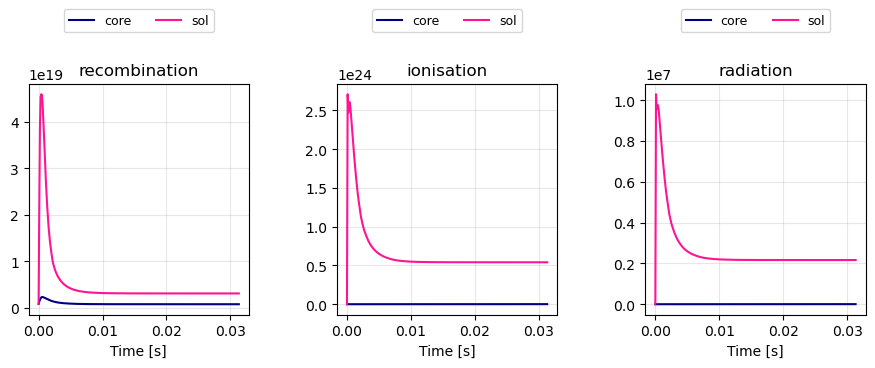

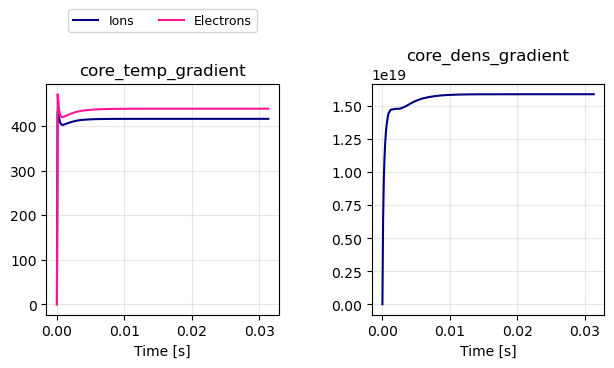

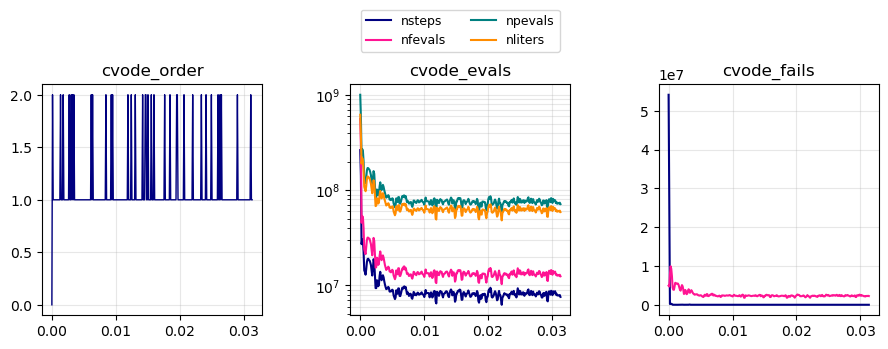

In [ ]:
Monitor(casestore["base"], [["sep_ne", "sep_te"],
               ["recombination", "ionisation", "radiation"],
               ["core_temp_gradient", "core_dens_gradient"],
               ["cvode_order", "cvode_evals", "cvode_fails"]])
# Monitor(case, [["recombination", "ionisation", "radiation"]])

ValueError: min() arg is an empty sequence

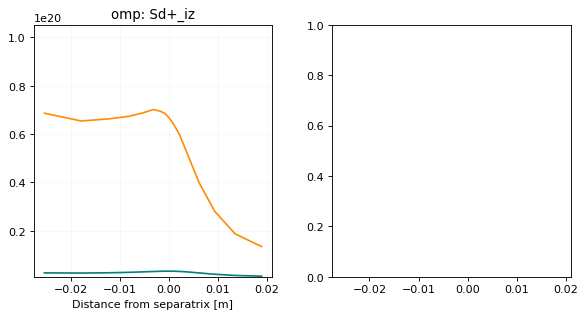

In [60]:
plt.close("all")
lineplot_compare(
    cases = { 
    "Hermes-3: pre-fixes" : dict(data=hr["x3a1-mxorder3-1e-4rtol"], color = "teal"),
    "Hermes-3: post-fixes" : dict(data=hr["x3a2-post_1D_fixes"], color = "darkorange")
    },
    colors = ["teal", "darkorange", "black", "red", "deeppink", "darkorange"],
    regions = ["omp", "imp", "outer_lower"], params = ["Sd+_iz", "Sd+_rec"],
    mode = "log",
    dpi = 80,
    set_xlim = False,
)